# Tutorial notebook for the parametrized QNM framework

For Schwarzschild, this code is based on the coefficients derived in Völkel, Franchini and Barausse, 
https://arxiv.org/abs/2202.08655

For Kerr, this code is based on the formalism and coefficients derived in Cano, Capuano, Franchini, Maeunaut and Völkel, TBD

Because the parametrization is different, please look up the definition of how deviations are defined in those references, e.g., the range of deviations $\alpha_k$ differs.

#### Some general documentation


$\textbf{Schwarzschild}$: 

Currently including real or complex valued coefficients for $\alpha_k$ with $k \in [0,\dots, 10]$.

available QNMs
* $\ell \in [0,1,2,3,4]$ for scalar and $\ell \in [2,3,4]$ for tensor.
* $n \in [0,1,2]$.

available orders: "linear", "quadratic"

available filed content: "scalar", "tensor_axial", "tensor_polar"

$\textbf{Kerr}$: 

Currently including real or complex valued coefficients for $\alpha_k$ with $k \in [-6,\dots, 4]$. Note the index shift when specifying the parameter injection that always starts with the zero entry of an array.

available QNMs
* $\ell \in [2,3,4]$
* $m \in [-\ell, \dots, \ell]$
* $n \in [0,1,2]$.

available orders: "linear"

quadratic coefficients for Teukolsky are currently only available for a subset of modes and only for diagonal ones.


available filed content: "tensor"


#### How to use the code:

To compute QNMs one has to initialize the QNM class for a given field content and accuracy.

QNM.initialize(field content, order)

#### Notes:

* N_beta = 11 is hard coded here AND in the extra functions
* units in which M = 1/2

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import extra_functions as EF
from QNM_class import QNM_class
N_beta = 11

### Initialize QNM class for Kerr

In [2]:
%%time
"""
Initialize the QNM_class(). This will load the coefficients. 
For Kerr it will also build CubicSpline interpolations for the spin,
from which all QNMs will be computed.
"""
field_content = "tensor"
order         = "linear"
QNM = QNM_class()
QNM.initialize(field_content, order)

Initialized QNM class for computations with field = tensor and approximant = linear.
CPU times: user 2.04 s, sys: 311 ms, total: 2.35 s
Wall time: 2.06 s


####  Example 1: compute QNM and separation constant

In [3]:
"""
compute the l=2, m=2, n=0, a=0 
QNM and separation constant B for GR injcetion X_GR
"""
X_GR           = np.zeros(N_beta, dtype=complex)
l_, m_, n_, a_ = 2, 2, 0, 0
print("QNM = ", QNM.qnm(l_, m_, n_, a_, X_GR))
print("separation constant B = ", QNM.constant(l_, m_, n_, a_, X_GR))

QNM =  [ 0.74734337 -0.17792463]
separation constant B =  [8.00000000e+00 3.46944695e-18]


#### Example 2: compute QNM and separation constant for a non-GR case

In [4]:
"""
introduce a non-zero GR coefficient for alpha = 0.1*(1+i)
"""
X_not_GR     = np.zeros(N_beta, dtype=complex)
X_not_GR[2]  = 0.3*(1+1j)
print("QNM = ", QNM.qnm(l_, m_, n_, a_, X_not_GR))
print("separation constant B = ", QNM.constant(l_, m_, n_, a_, X_not_GR))

QNM =  [ 0.74749132 -0.17159624]
separation constant B =  [8.00000000e+00 6.21045571e-09]


#### Example 3: compute 220 mode for various spins

In [5]:
%%time 

"""
compute 220 mode for 10000 different values of the spin
"""
a_range          = np.linspace(0,0.45, 10000)
qnm_range_GR     = QNM.qnm(l_, m_, n_, a_range, X_GR)
qnm_range_not_GR = QNM.qnm(l_, m_, n_, a_range, X_not_GR)

CPU times: user 8.01 ms, sys: 41 µs, total: 8.06 ms
Wall time: 7.74 ms


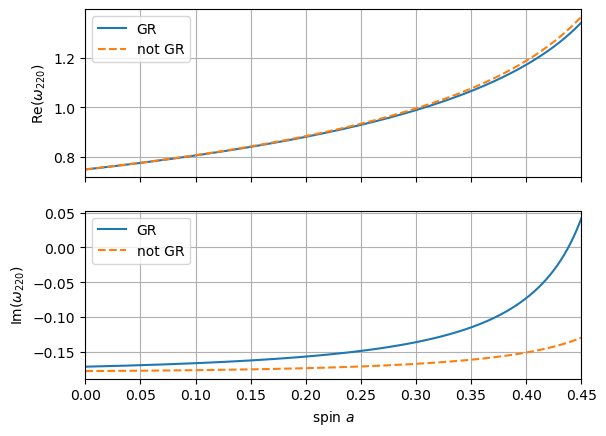

In [6]:
"""
plot 220 mode versus spins
"""

fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].plot(a_range, qnm_range_GR[0], '-',     label="GR")
axs[0].plot(a_range, qnm_range_not_GR[0], '--', label="not GR")
axs[1].plot(a_range, qnm_range_not_GR[1], '-', label="GR")
axs[1].plot(a_range, qnm_range_GR[1], '--',     label="not GR")

axs[0].set_xlim(0,a_range[-1])
axs[0].legend(loc="upper left")
axs[1].legend(loc="upper left")
axs[0].grid()
axs[1].grid()
axs[1].set_xlabel("spin $a$")
axs[0].set_ylabel("Re($\omega_{220}$)")
axs[1].set_ylabel("Im($\omega_{220}$)")

plt.show()

### Initialize QNM class for Schwarzschild

In [7]:
%%time
"""
Initialize the QNM_class(). This will load the coefficients. 
In this example we load the scalar field at quadratic order.
"""
field_content = "scalar"
order         = "quadratic"
QNM = QNM_class()
QNM.initialize(field_content, order)

Nonrotating case.
CPU times: user 1.77 ms, sys: 1.22 ms, total: 2.99 ms
Wall time: 3 ms


####  Example 1: compute QNMs

In [8]:
"""
compute the l=2, m=2, n=0
QNM for GR injcetion X_GR
"""
X_GR           = np.zeros(N_beta, dtype=complex)
l_, m_, n_, a_ = 2, 2, 0, 0
print("QNM = ", QNM.qnm(l_, m_, n_, a_, X_GR))

QNM =  [ 0.96728774 -0.19351755]


####  Example 2: compare linear and quadratic computation

In [9]:
"""
to access the linear or quadratic QNM prediction in the Schwarzschild case,
one can call the following sub-functions directly, even for different field_content
QNM.compute_qnm_lin(field_content, l_, n_, X_)
QNM.compute_qnm_quad(field_content, l_, n_, X_)

Here we look at a GR modifcation again.
"""

X_not_GR     = np.zeros(N_beta, dtype=complex)
X_not_GR[2]  = 0.3*(1+1j)

print("QNM_linear= ", QNM.compute_qnm_lin(field_content, l_, n_, X_not_GR))
print("QNM_quadratic = ", QNM.compute_qnm_quad(field_content, l_, n_, X_not_GR))

QNM_linear=  [ 0.99020834 -0.17049627]
QNM_quadratic =  [ 0.99021308 -0.17104152]
